In [256]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dense, Input, Activation, Flatten, Embedding, SpatialDropout1D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import numpy as np

In [3]:
# Turn off scientific notation
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [4]:
RANDOM_SEED =4299
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
### NORMALDE TOKENIZE ASAGIDAKI GIBI YAPILMALI
# tokenizer = Tokenizer(num_words=max_words) 
# tokenizer.fit_on_texts(training_data)
# training_data = tokenizer.texts_to_sequences(training_data)
# test_data = tokenizer.texts_to_sequences(test_data)

In [5]:
# ilk 10K kelimeyi alacagiz
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
train_labels[0]

1

In [8]:
train_data.shape

(25000,)

In [9]:
a = np.array(train_data)

In [10]:
type(train_data)

numpy.ndarray

In [11]:
# En buyuk index e sahip olan kelime'nin indexi
max([max(sequence) for sequence in train_data])

9999

In [12]:
word2idx = imdb.get_word_index()

In [13]:
from itertools import islice
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [14]:
n_items = take(33, word2idx.items())
n_items

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008),
 ("hold's", 52009),
 ('comically', 11307),
 ('localized', 40830),
 ('disobeying', 30568),
 ("'royale", 52010),
 ("harpo's", 40831),
 ('canet', 52011),
 ('aileen', 19313),
 ('acurately', 52012),
 ("diplomat's", 52013),
 ('rickman', 25242),
 ('arranged', 6746),
 ('rumbustious', 52014),
 ('familiarness', 52015),
 ("spider'", 52016),
 ('hahahah', 68804),
 ("wood'", 52017),
 ('transvestism', 40833),
 ("hangin'", 34702),
 ('bringing', 2338),
 ('seamier', 40834),
 ('wooded', 34703),
 ('bravora', 52018)]

In [15]:
idx2word = dict((word, idx) for (idx, word) in word2idx.items())

In [16]:
take(33, idx2word.items())

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora')]

### Indicies are offset by 3 because 0, 1, 2 are reserved indicies for "padding", "start of sentence" and "unknown"

In [17]:
decoded_review = " ".join([idx2word.get(i-3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [18]:
MAX_TEXT_LENGTH = 200
PAD_TYPE = TRUNC_TYPE = 'post'
NUM_CLASSES = len(np.unique(train_labels))
print("NUM CLASSES : ", NUM_CLASSES)

NUM CLASSES :  2


In [19]:
X_train = pad_sequences(train_data, maxlen=MAX_TEXT_LENGTH, padding=PAD_TYPE, truncating=TRUNC_TYPE, value=0)
X_test = pad_sequences(test_data, maxlen=MAX_TEXT_LENGTH, padding=PAD_TYPE, truncating=TRUNC_TYPE, value=0)

In [20]:
X_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [21]:
X_test[0]

array([   1,  591,  202,   14,   31,    6,  717,   10,   10,    2,    2,
          5,    4,  360,    7,    4,  177, 5760,  394,  354,    4,  123,
          9, 1035, 1035, 1035,   10,   10,   13,   92,  124,   89,  488,
       7944,  100,   28, 1668,   14,   31,   23,   27, 7479,   29,  220,
        468,    8,  124,   14,  286,  170,    8,  157,   46,    5,   27,
        239,   16,  179,    2,   38,   32,   25, 7944,  451,  202,   14,
          6,  717,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [22]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [24]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

### Shuffling Data

In [26]:
indicies = np.arange(X_train.shape[0])
X_train = X_train[indicies]
y_train = y_train[indicies]

### Model

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=4299, test_size=0.2)

In [227]:
n_unique_words = 10000
n_dim = 64 
drop_embed = 0.2

In [252]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=MAX_TEXT_LENGTH))
model.add(SpatialDropout1D(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [253]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 200, 64)           640000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 200, 64)           0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_59 (Dense)             (None, 16)                204816    
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_13 (Dropout)         (None, 8)               

In [254]:
model.compile(loss='binary_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy'])

In [255]:
history = model.fit(X_train, y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(X_valid, y_valid))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 82us/sample - loss: 0.2502 - accuracy: 0.4976 - val_loss: 0.2497 - val_accuracy: 0.5352
Epoch 2/20
20000/20000 [==============================] - 1s 59us/sample - loss: 0.2473 - accuracy: 0.5335 - val_loss: 0.2419 - val_accuracy: 0.6282
Epoch 3/20
20000/20000 [==============================] - 1s 61us/sample - loss: 0.2295 - accuracy: 0.6242 - val_loss: 0.2038 - val_accuracy: 0.7414
Epoch 4/20
20000/20000 [==============================] - 1s 60us/sample - loss: 0.1925 - accuracy: 0.7204 - val_loss: 0.1584 - val_accuracy: 0.8070
Epoch 5/20
20000/20000 [==============================] - 1s 61us/sample - loss: 0.1546 - accuracy: 0.7974 - val_loss: 0.1283 - val_accuracy: 0.8314
Epoch 6/20
20000/20000 [==============================] - 1s 61us/sample - loss: 0.1281 - accuracy: 0.8337 - val_loss: 0.1119 - val_accuracy: 0.8512
Epoch 7/20
20000/20000 [==============================] -

### Loss Plot

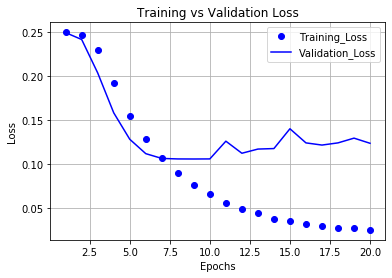

In [260]:
import matplotlib.pyplot as plt
hist_dict = history.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training_Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation_Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show();

### Accuracy Plot

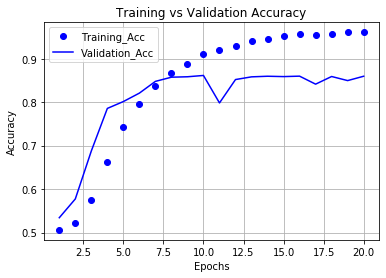

In [258]:
plt.clf()
acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']

epochs = range(1, len(acc_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training_Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation_Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show();

### Testing Model

In [248]:
results = model.evaluate(X_test, y_test)
print(results)

25000/25000 [==============================] - 1s 26us/sample - loss: 0.7657 - accuracy: 0.8457
[0.7656672910022736, 0.84572]


In [249]:
model.predict(X_test)

array([[1.6308513e-04],
       [9.9998820e-01],
       [9.8523682e-01],
       ...,
       [4.4761422e-05],
       [6.2768110e-03],
       [9.7388917e-01]], dtype=float32)